**EDA of (Google) App store data**

The dataset used for this project contains information on over 10,000 applications available in the Google Play Store. Included information includes the category of application, their size, ratings, price, etc. The main focus of this exploratory data analysis project is to get an insight into what makes an application higly rated and downloaded. This has been done mainly with the help of various visualizations readily available in the Seaborn and Matplotlib libraries of Python.

In [161]:
# IMPORTING REQUIRED MODULES

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [162]:
# TO SUPPRESS WARNINGS

import warnings
warnings.filterwarnings("ignore")

In [163]:
df_store = pd.read_csv('Play Store Data.csv')       # IMPORTING APP DATA

In [164]:
df_user = pd.read_csv('User Reviews.csv')           # IMPORTING USER REVIEW DATA

**Cleaning and Reformatting**: The lines of code below is used to convert applicable columns to numerical data types and also remove unusable data.

In [165]:
df_store[df_store['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [166]:
df_store = df_store.drop(10472)

In [167]:
# df_store['Reviews'] = df_store['Reviews'].apply(lambda x: '3000000' if x == '3.0M' else x)
df_store['Reviews'] = df_store['Reviews'].astype('int64')

In [168]:
df_store['Size'] = df_store['Size'].apply(lambda x: x.strip('M'))

df_store['Size'] = df_store['Size'].apply(lambda x: x if x.endswith('e') else float(x.strip('k'))/1024)
# df_store[df_store['Size'].str.endswith('e')]

df_store['Size'] = pd.to_numeric(df_store['Size'],errors='coerce')

In [169]:
df_store['Installs'] = df_store['Installs'].apply(lambda x: x.strip('+') if x.endswith('+') else x)
df_store['Installs'] = df_store['Installs'].apply(lambda x: x.replace(',',''))
df_store['Installs'] = pd.to_numeric(df_store['Installs'],errors='coerce')

In [170]:
df_store['Price'] = df_store['Price'].apply(lambda x: x.strip('$') if x.startswith('$') else x)
df_store['Price'] = pd.to_numeric(df_store['Price'],errors='coerce')

**DATA VISUALISATION:**

In [171]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


<Axes: >

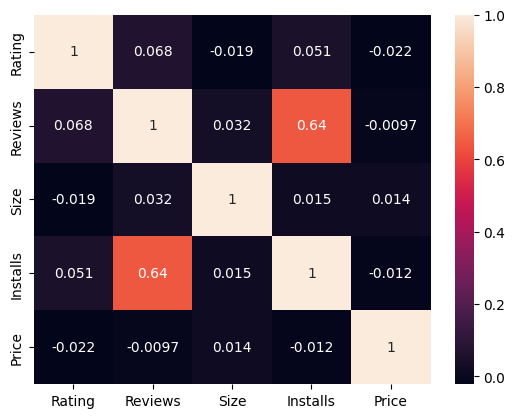

In [172]:
# CORRELATION AMONG THE NUMERICAL COLUMNS

sns.heatmap(data=df_store.corr(numeric_only=True),annot=True)

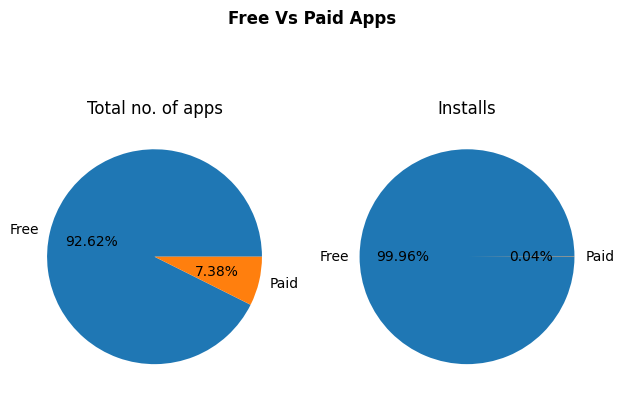

In [173]:
fig, axes = plt.subplots(nrows=1,ncols=2)

_ = df_store['Type'].value_counts()
axes[0].pie(x=_.values,labels=_.index,autopct='%0.2f%%')
axes[0].set_title('Total no. of apps')


_ = df_store.groupby('Type')['Installs'].sum()
axes[1].pie(x=_.values,labels=_.index,autopct='%0.2f%%')
axes[1].set_title('Installs')

fig.suptitle('Free Vs Paid Apps',fontweight='bold')

plt.tight_layout()

<Axes: xlabel='Rating', ylabel='Count'>

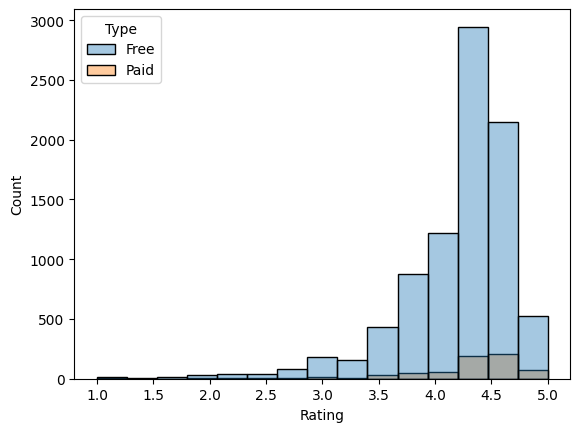

In [174]:
# DISTRIBUTION OF RATINGS FOR FREE AND PAID APPS
sns.histplot(data=df_store,x='Rating',bins=15,hue='Type',alpha=0.4)

In [175]:
print('Average ratings:')
df_store.groupby('Type')['Rating'].mean()

Average ratings:


Type
Free    4.186203
Paid    4.266615
Name: Rating, dtype: float64

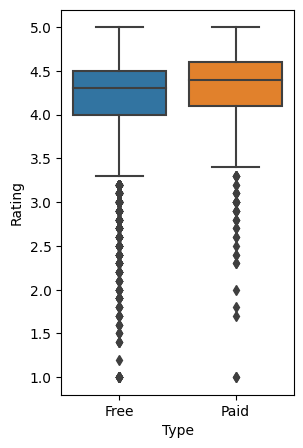

In [176]:
# fig, axes = plt.subplots(nrows=1,ncols=2)

# _ = df_store.groupby('Type')['Rating'].mean()
# # plt.figure(figsize=(4,2))
# sns.barplot(x=_.index,y=_.values,ax=axes[0])
# axes[0].set_ylabel('Average Rating')

plt.figure(figsize=(3,5))
sns.boxplot(data=df_store,x='Type',y='Rating')
# sns.kdeplot(data=df_store,x='Type',y='Rating')

plt.show()

# DISTRIBUTION OF RATINGS OF FREE VS PAID APPS

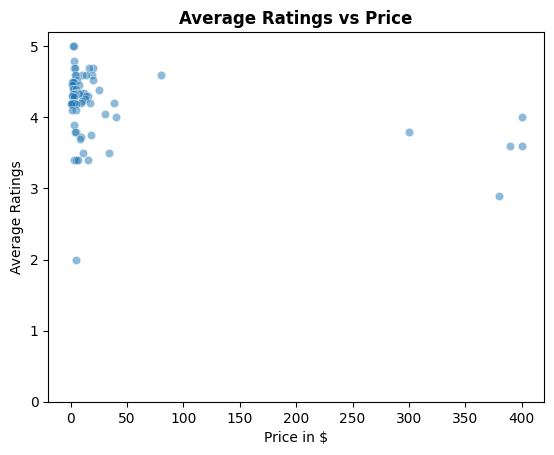

In [177]:
_ = df_store.groupby('Price')['Rating'].mean().sort_values(ascending=False)
sns.scatterplot(x=_.index,y=_.values,alpha=0.5)
# plt.xticks(rotation=90)
plt.ylim(0,5.2)
plt.ylabel('Average Ratings')
plt.xlabel('Price in $')
plt.title('Average Ratings vs Price',fontweight='bold')
plt.show()

# PRICE VS RETURN ?

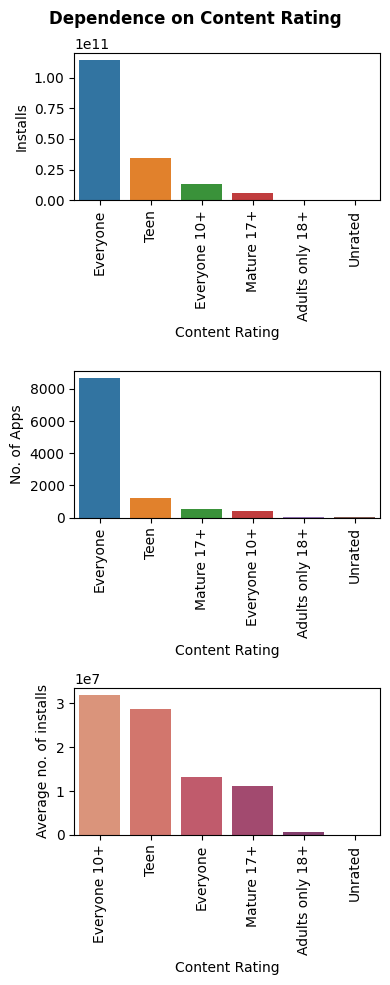

In [189]:
# DEPENDENCE ON CONTENT RATING OF APPS ?

fig, axes = plt.subplots(3,1,figsize=(4,10))        # CREATING SUBPLOTS OF 3 ROWS AND 1 COLUMN
_ = df_store.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)
sns.barplot(x=_.index,y=_.values,ax=axes[0])
axes[0].set_ylabel('Installs')

_ = df_store['Content Rating'].value_counts()
sns.barplot(x=_.index,y=_.values,ax=axes[1])
axes[1].set_ylabel('No. of Apps')

# AVERAGE NO. OF INSTALLS PER CATEGORY OF CONTENT RATING
_ = (df_store.groupby('Content Rating')['Installs'].sum().sort_index())/(df_store['Content Rating'].value_counts().sort_index())
_ = _.sort_values(ascending=False)
sns.barplot(x=_.index,y=_.values,ax=axes[2],palette='flare')
axes[2].set_ylabel('Average no. of installs')

for ax in axes:
    ax.tick_params(axis='x', rotation=90)

fig.suptitle('Dependence on Content Rating',fontweight='bold')

plt.tight_layout()

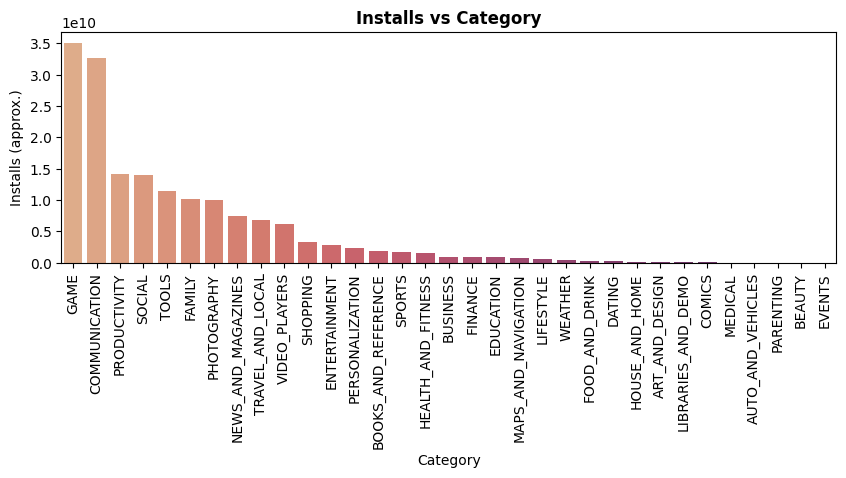

In [179]:
_ = df_store.groupby('Category')['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=_.index,y=_.values,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('Installs (approx.)')
plt.title('Installs vs Category',fontweight='bold')
plt.show()

In [180]:
print('Categories with most installs:')
_.head(6)

Categories with most installs:


Category
GAME             35086024415
COMMUNICATION    32647276251
PRODUCTIVITY     14176091369
SOCIAL           14069867902
TOOLS            11452771915
FAMILY           10258263505
Name: Installs, dtype: int64

In [181]:
df_store['weighted_rating'] = df_store['Rating']*df_store['Reviews']

# WEIGHTED RATING = RATING * NO. OF REVEIWS

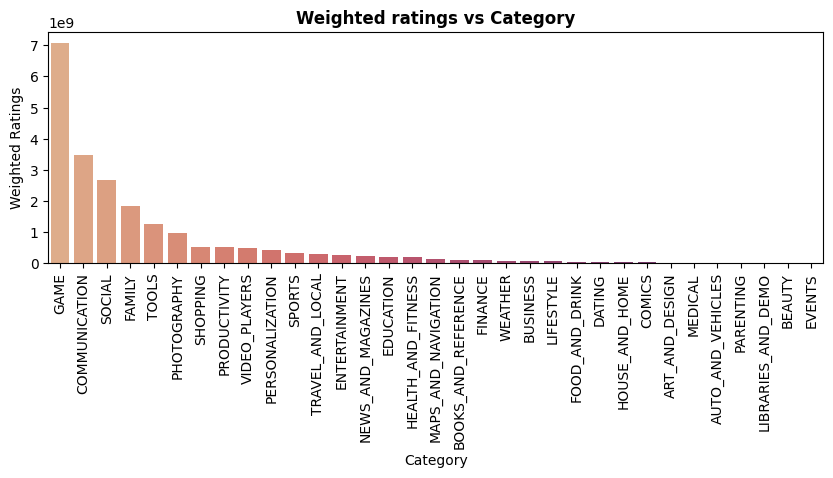

In [182]:
_ = df_store.groupby('Category')['weighted_rating'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,3))
sns.barplot(x=_.index,y=_.values,palette='flare')
plt.xticks(rotation=90)
plt.ylabel('Weighted Ratings')
plt.title('Weighted ratings vs Category',fontweight='bold')
plt.show()

In [183]:
print('Categories with highest weighted ratings:')
_.head(6)

# A NEED FOR BETTER PRODUCTIVITY APPS ?

Categories with highest weighted ratings:


Category
GAME             7.082552e+09
COMMUNICATION    3.485094e+09
SOCIAL           2.674650e+09
FAMILY           1.827190e+09
TOOLS            1.236329e+09
PHOTOGRAPHY      9.456303e+08
Name: weighted_rating, dtype: float64

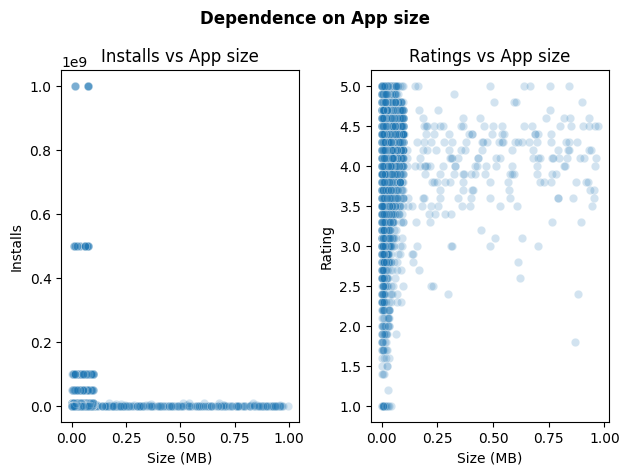

In [184]:

fig,axes = plt.subplots(1,2)        # CREATING SUBPLOTS OF 1 ROW AND 2 COLUMNS

sns.scatterplot(data=df_store,x='Size',y='Installs',alpha=0.2,ax=axes[0])
axes[0].set_title('Installs vs App size')
axes[0].set_xlabel('Size (MB)')

sns.scatterplot(data=df_store,x='Size',y='Rating',alpha=0.2,ax=axes[1])
axes[1].set_title('Ratings vs App size')
axes[1].set_xlabel('Size (MB)')

fig.suptitle('Dependence on App size',fontweight='bold')

plt.tight_layout()

In [185]:
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [186]:
df_user.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


<Axes: xlabel='Sentiment_Subjectivity', ylabel='Count'>

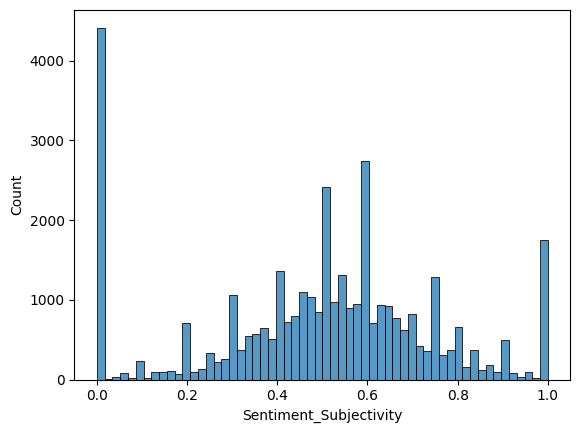

In [187]:
sns.histplot(data=df_user,x='Sentiment_Subjectivity')